Data Loading and Exploration

INSTALLING PACKAGED

In [ ]:
import pandas as pd

# Load the Raisin dataset
data = pd.read_csv("Raisin_Dataset.csv")

# Display the first few rows of the dataset
data.head(),data.describe(), data.info()

: 

In [2]:
data.isnull()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
895,False,False,False,False,False,False,False,False
896,False,False,False,False,False,False,False,False
897,False,False,False,False,False,False,False,False
898,False,False,False,False,False,False,False,False


In [3]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Data Preprocessing

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Summary of the preprocessed data
(X_train_scaled.shape, X_test_scaled.shape), y_train[:5], y_test[:5]


NameError: name 'data' is not defined

classification mode

LogisticRegression Model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train a Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

accuracy, conf_matrix, class_report


(0.8888888888888888,
 array([[75, 15],
        [ 5, 85]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       Besni       0.94      0.83      0.88        90\n     Kecimen       0.85      0.94      0.89        90\n\n    accuracy                           0.89       180\n   macro avg       0.89      0.89      0.89       180\nweighted avg       0.89      0.89      0.89       180\n')

# Random Forest model

In [6]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)
accuracy_rf, conf_matrix_rf, class_report_rf


(0.8666666666666667,
 array([[71, 19],
        [ 5, 85]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       Besni       0.93      0.79      0.86        90\n     Kecimen       0.82      0.94      0.88        90\n\n    accuracy                           0.87       180\n   macro avg       0.88      0.87      0.87       180\nweighted avg       0.88      0.87      0.87       180\n')

# Decision Tree model

In [7]:
from sklearn.tree import DecisionTreeClassifier
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)
# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_)
accuracy_dt, conf_matrix_dt, class_report_dt


(0.8444444444444444,
 array([[70, 20],
        [ 8, 82]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       Besni       0.90      0.78      0.83        90\n     Kecimen       0.80      0.91      0.85        90\n\n    accuracy                           0.84       180\n   macro avg       0.85      0.84      0.84       180\nweighted avg       0.85      0.84      0.84       180\n')

# Gaussian Naive Bayes model

In [8]:
from sklearn.naive_bayes import GaussianNB
# Train a Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred_gnb = gnb_model.predict(X_test_scaled)
# Evaluate the Gaussian Naive Bayes model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
class_report_gnb = classification_report(y_test, y_pred_gnb, target_names=label_encoder.classes_)
accuracy_gnb, conf_matrix_gnb, class_report_gnb


(0.8333333333333334,
 array([[64, 26],
        [ 4, 86]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       Besni       0.94      0.71      0.81        90\n     Kecimen       0.77      0.96      0.85        90\n\n    accuracy                           0.83       180\n   macro avg       0.85      0.83      0.83       180\nweighted avg       0.85      0.83      0.83       180\n')

In [17]:
model = pd.DataFrame({'module':['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','GaussianNB'],
                      'score':[accuracy,accuracy_rf,accuracy_dt,accuracy_gnb],
                      })
model

,module,score
0,LogisticRegression,0.888889
1,RandomForestClassifier,0.866667
2,DecisionTreeClassifier,0.844444
3,GaussianNB,0.833333


# Flask app setup

In [10]:
import joblib

# Save the trained model to a file
model_filename = 'D:/smart, project-1/Raisin Revolution/raisin_classification_model.pkl'
joblib.dump(logreg, model_filename)

# Save the scaler as well
scaler_filename = 'D:/smart, project-1/Raisin Revolution/raisin_scaler.pkl'
joblib.dump(scaler, scaler_filename)

model_filename, scaler_filename


('D:/smart, project-1/Raisin Revolution/raisin_classification_model.pkl',
 'D:/smart, project-1/Raisin Revolution/raisin_scaler.pkl')

In [11]:
import joblib

# Save the trained model to a file
joblib.dump(logreg, 'raisin_classification_model.pkl')

# Save the scaler as well
joblib.dump(scaler, 'raisin_scaler.pkl')


['raisin_scaler.pkl']

# visulazition


# HISTOGRAM

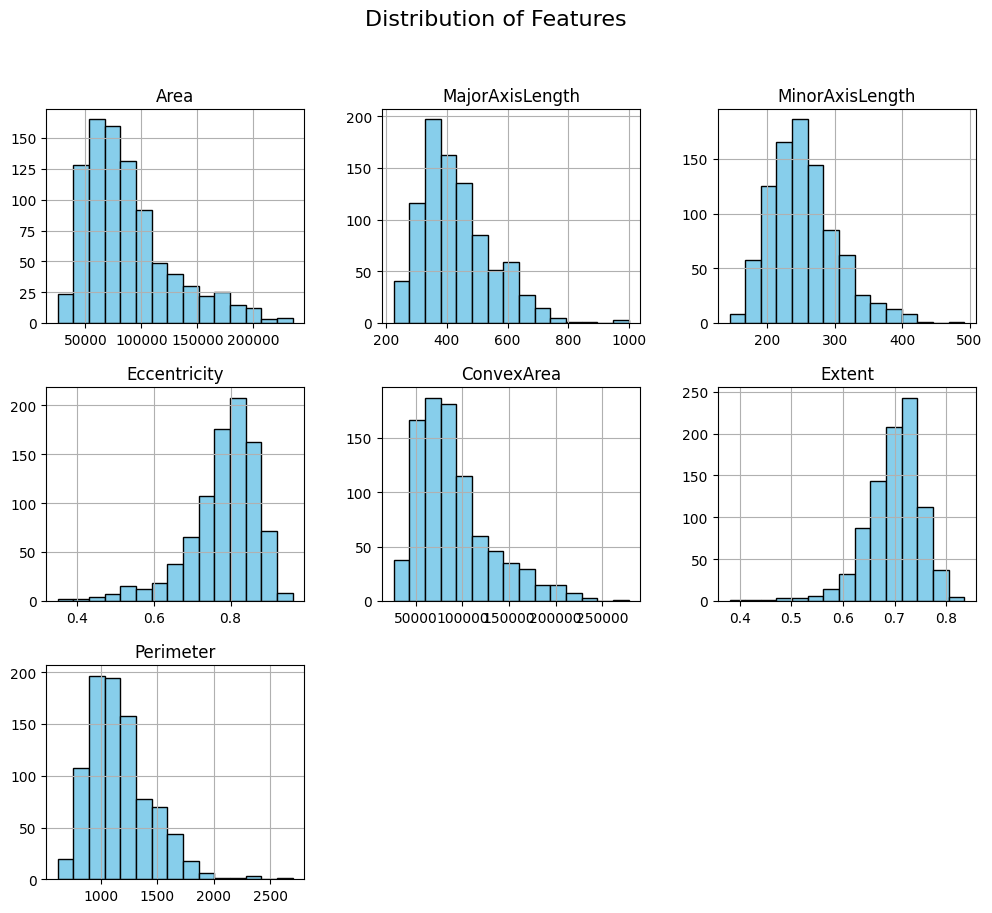

In [12]:
import matplotlib.pyplot as plt
# Creating DataFrame
df = pd.DataFrame(data)

# Histograms for each numeric featureS
df.drop('Class', axis=1).hist(figsize=(12, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Scatter Plot for MajorAxisLength vs MinorAxisLength


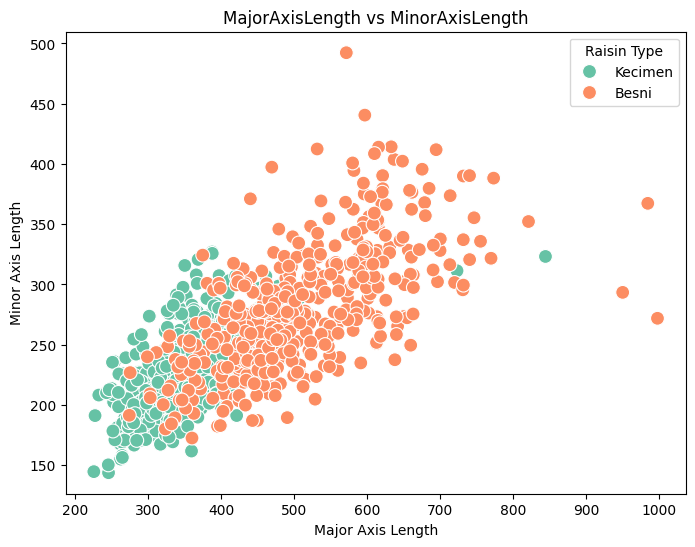

In [14]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MajorAxisLength', y='MinorAxisLength', hue='Class', data=df, palette='Set2', s=100)
plt.title('MajorAxisLength vs MinorAxisLength')
plt.xlabel('Major Axis Length')
plt.ylabel('Minor Axis Length')
plt.legend(title='Raisin Type')
plt.show()


#  Pairplot to Visualize Relationships Between All Features

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\dell\AppData\Local\Packages\PythonSoftwareF

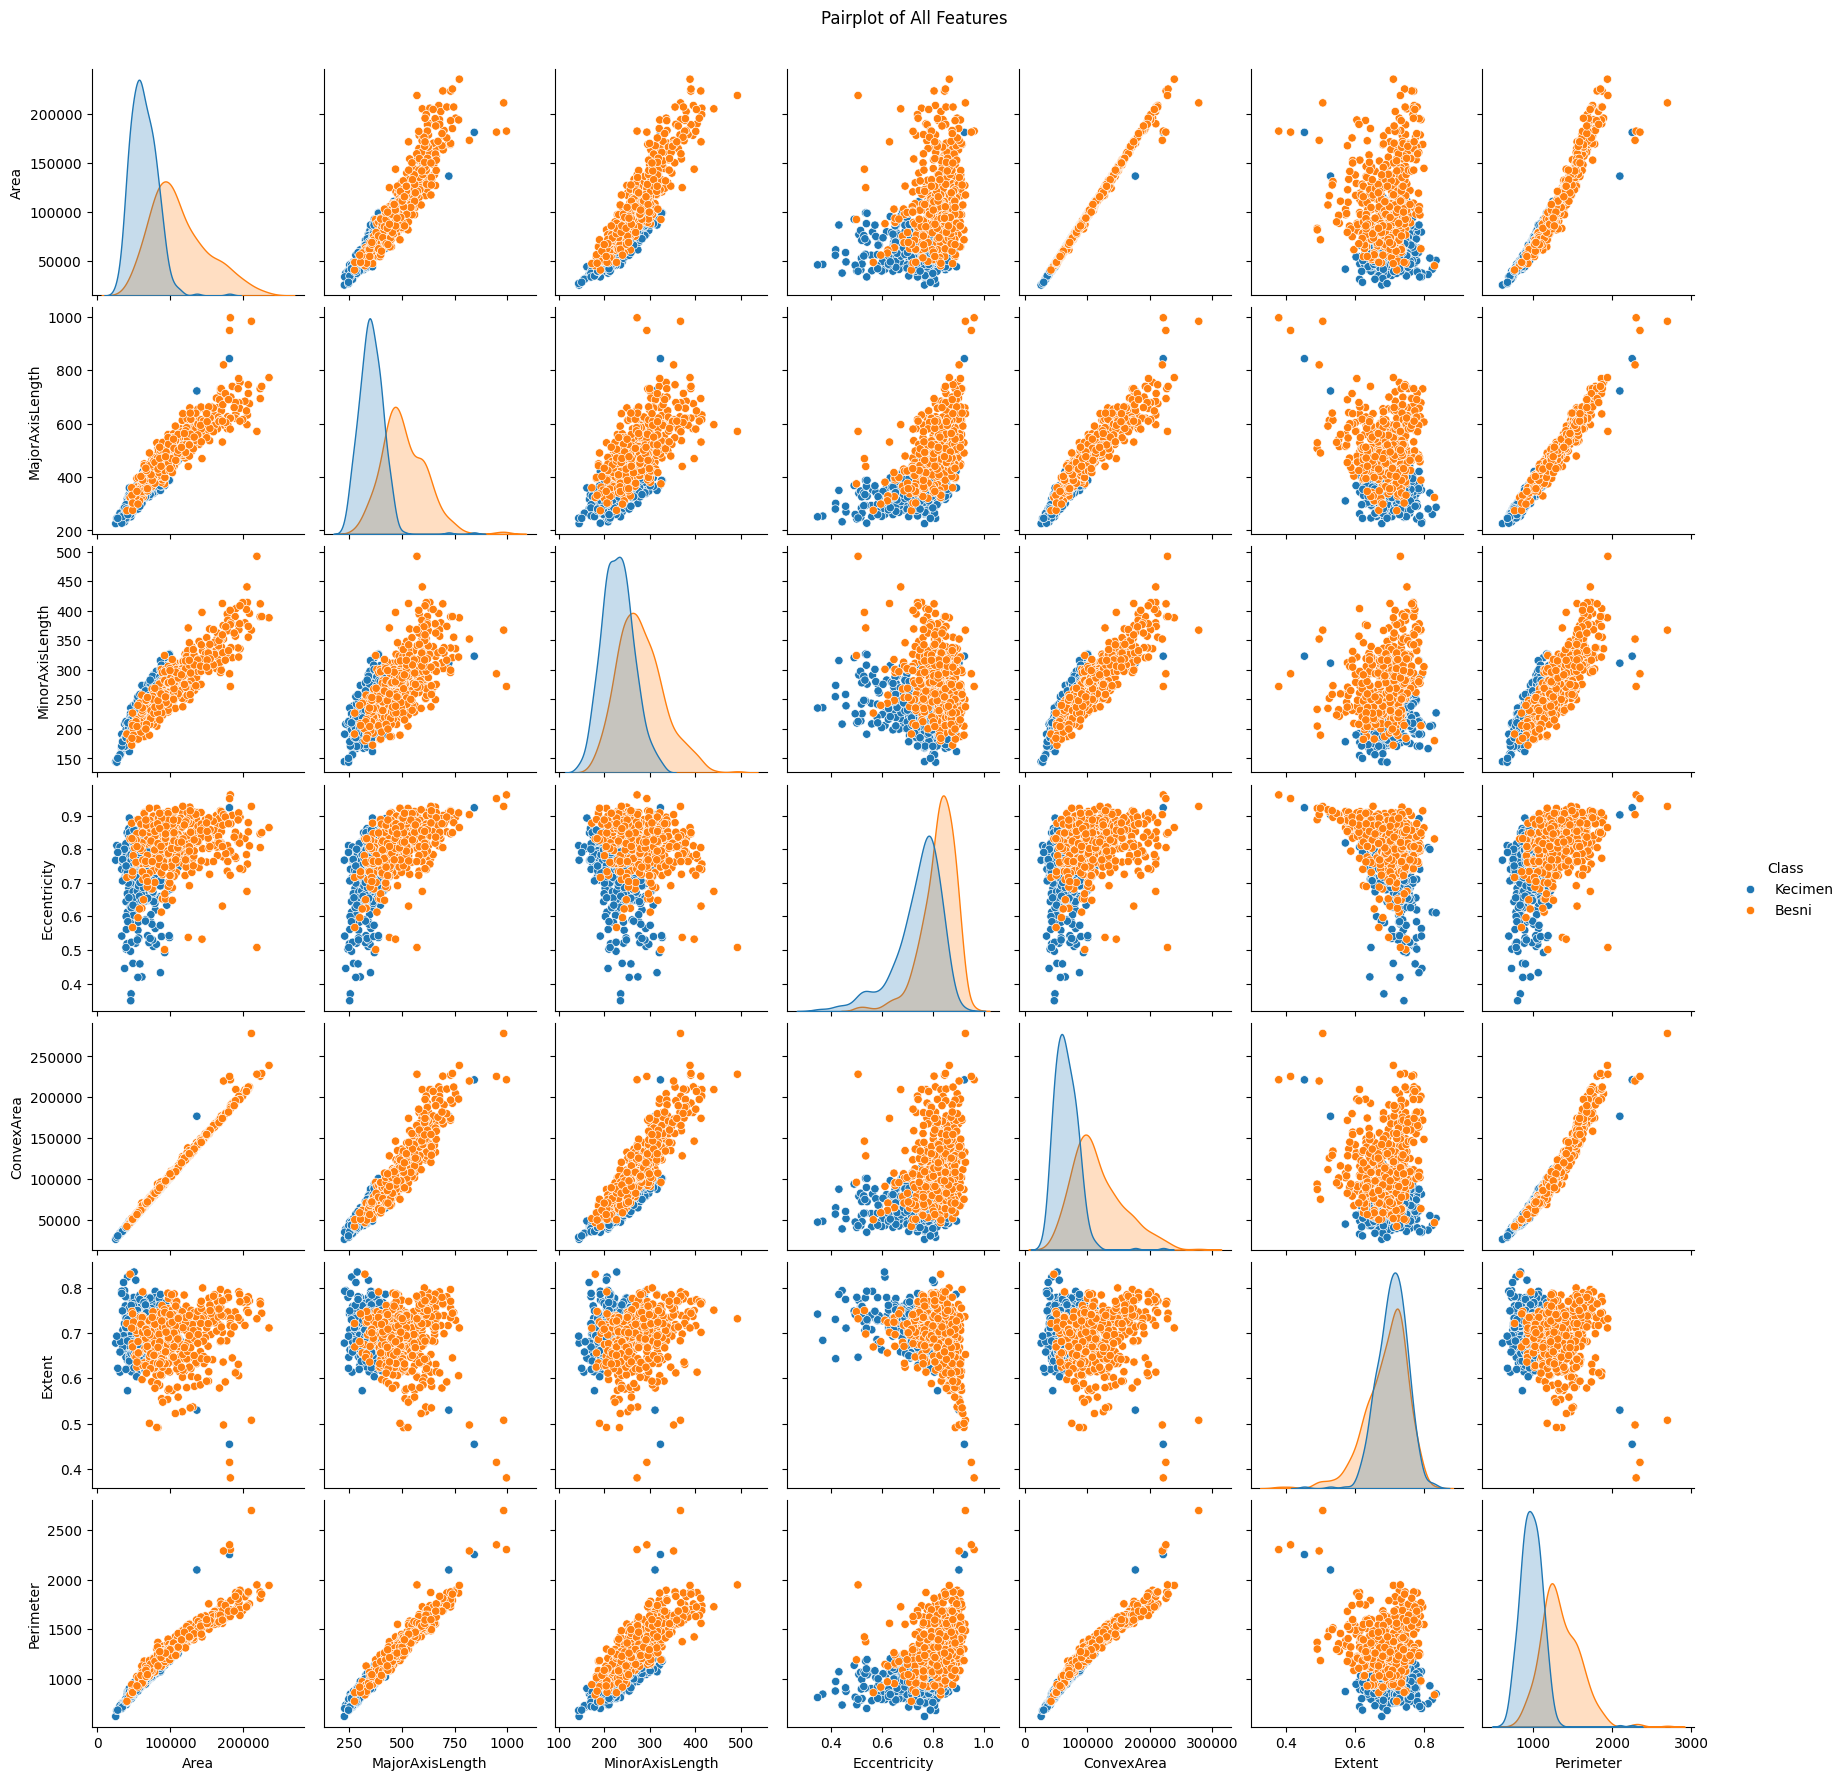

In [15]:
# Pairplot
sns.pairplot(df, hue='Class', markers=["o"])
plt.suptitle('Pairplot of All Features', y=1.02)
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'